This notebook represents the full pipeline of the analysis completed in the MSc thesis "Implied Volatility Skew Modelling" completed by Mikhail Borovkov for the MSc in Finance degree at Bocconi University in the academic year 2022/23.

### Loading libraries

In [8]:
import pandas as pd
import numpy as np

import yfinance as yf

import matplotlib.pyplot as plt
from datetime import datetime

from pathlib import Path  
filepath = 'D:/Misha/Documents/MSc Thesis/' 

import itertools

from pandas.tseries.offsets import BDay

import nasdaqdatalink

from scipy.optimize import fsolve
from scipy.stats import norm

import wrds
#db = wrds.Connection(wrds_username='mborovkov')

Loading library list...
Done


# Data Collection - takes several hours for the entire process, and also requires a WRDS account; skip to PRELOAD DATASET to get to the next step

### SECID List Creation

In [4]:
#sp500_fund = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
#df = sp500_fund[0]

In [5]:
sp500_hist = pd.read_csv('SP500Hist.csv', sep = ',')
sp500_hist.tickers = sp500_hist.tickers.str.replace('"','')

sp500_hist.tickers = sp500_hist.tickers.str.split(',')

import itertools
sp500_ticker_list = tuple(set(itertools.chain.from_iterable(sp500_hist.tickers)))

In [6]:
sp500_ticker_list

('IDXX',
 'UNH',
 'ODFL',
 'HM',
 'CMA',
 'DFS',
 'BAX',
 'MTLQQ',
 'NYT',
 'DEC',
 'CTX',
 'DVN',
 'CVC',
 'TRB',
 'TWX',
 'TSCO',
 'OK',
 'VFC',
 'KMI',
 'CEPH',
 'URBN',
 'FLIR',
 'NAVI',
 'HPH',
 'V',
 'TFC',
 'WM',
 'FHN',
 'MAS',
 'OWENQ',
 'RRC',
 'RAL',
 'LIN',
 'EOP',
 'HOG',
 'NEM',
 'PSX',
 'EA',
 'COG',
 'CMCSA',
 'DG',
 'PTV',
 'GOOG',
 'CCE',
 'DDS',
 'ECL',
 'MKC',
 'NCR',
 'JBHT',
 'ENPH',
 'GNRC',
 'AIV',
 'PBCT',
 'MMC',
 'LNC',
 'USW',
 'AEE',
 'CTSH',
 'USS',
 'SII',
 'FSLR',
 'NXTL',
 'CME',
 'FTNT',
 'ASH',
 'UPC',
 'KRFT',
 'COP',
 'DYN',
 'NVLS',
 'CDAY',
 'CIN',
 'MGM',
 'FDS',
 'ALL',
 'EP',
 'PD',
 'DJ',
 'MNK',
 'REGN',
 'HBAN',
 'COST',
 'FDX',
 'FMC',
 'LYB',
 'CHA',
 'TA',
 'MAR',
 'SLR',
 'FMCC',
 'COF',
 'SUB',
 'SXCL',
 'SO',
 'HRS',
 'KWP',
 'TEN',
 'BJS',
 'SYF',
 'WNDXQ',
 'OGN',
 'SBNY',
 'MKTX',
 'MAC',
 'ONE',
 'WWY',
 'HOLX',
 'STE',
 'FE',
 'IRM',
 'MAA',
 'MI',
 'RRD',
 'KEY',
 'BKR',
 'STR',
 'MTB',
 'ENRNQ',
 'CCK',
 'MDT',
 'CEN',
 'AEP',
 

In [7]:
sp500_secid_df = db.raw_sql(f'''select secid, ticker
                    FROM optionm_all.secnmd
                    WHERE ticker IN {sp500_ticker_list}
                    ''').drop_duplicates().reset_index(drop = True)

sp500_secid_df = sp500_secid_df[sp500_secid_df['secid'] > 99999]

OperationalError: (psycopg2.OperationalError) server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

[SQL: select secid, ticker
                    FROM optionm_all.secnmd
                    WHERE ticker IN ('IDXX', 'UNH', 'ODFL', 'HM', 'CMA', 'DFS', 'BAX', 'MTLQQ', 'NYT', 'DEC', 'CTX', 'DVN', 'CVC', 'TRB', 'TWX', 'TSCO', 'OK', 'VFC', 'KMI', 'CEPH', 'URBN', 'FLIR', 'NAVI', 'HPH', 'V', 'TFC', 'WM', 'FHN', 'MAS', 'OWENQ', 'RRC', 'RAL', 'LIN', 'EOP', 'HOG', 'NEM', 'PSX', 'EA', 'COG', 'CMCSA', 'DG', 'PTV', 'GOOG', 'CCE', 'DDS', 'ECL', 'MKC', 'NCR', 'JBHT', 'ENPH', 'GNRC', 'AIV', 'PBCT', 'MMC', 'LNC', 'USW', 'AEE', 'CTSH', 'USS', 'SII', 'FSLR', 'NXTL', 'CME', 'FTNT', 'ASH', 'UPC', 'KRFT', 'COP', 'DYN', 'NVLS', 'CDAY', 'CIN', 'MGM', 'FDS', 'ALL', 'EP', 'PD', 'DJ', 'MNK', 'REGN', 'HBAN', 'COST', 'FDX', 'FMC', 'LYB', 'CHA', 'TA', 'MAR', 'SLR', 'FMCC', 'COF', 'SUB', 'SXCL', 'SO', 'HRS', 'KWP', 'TEN', 'BJS', 'SYF', 'WNDXQ', 'OGN', 'SBNY', 'MKTX', 'MAC', 'ONE', 'WWY', 'HOLX', 'STE', 'FE', 'IRM', 'MAA', 'MI', 'RRD', 'KEY', 'BKR', 'STR', 'MTB', 'ENRNQ', 'CCK', 'MDT', 'CEN', 'AEP', 'ASN', 'DPHIQ', 'BLL', 'AMP', 'FFIV', 'OMX', 'CYM', 'EXC', 'NCC', 'NC', 'ABI', 'TKR', 'MTG', 'PCS', 'KLAC', 'STLD', 'RYC', 'MCD', 'KORS', 'GDW', 'ADS', 'SLM', 'WLTW', 'GR', 'WB', 'HOT', 'SEE', 'WLP', 'AFS.A', 'JBL', 'BCR', 'TDG', 'F', 'AMZN', 'PAYX', 'ROP', 'FLTWQ', 'STX', 'NLSN', 'RDC', 'BR', 'MSFT', 'CHRS', 'CSX', 'GSX', 'PGL', 'TSLA', 'UCM', 'WFC', 'PMCS', 'NBL', 'ALLE', 'ACS', 'ORLY', 'NE', 'CERN', 'CRM', 'SMI', 'SAF', 'KMB', 'MWI', 'WEN', 'WAT', 'DHI', 'DELL', 'MER', 'NOW', 'CBB', 'VRTX', 'ADBE', 'SNV', 'DLX', 'FMY', 'LB', 'ESRX', 'FSH', 'PX', 'TIF', 'WRK', 'ACAS', 'FL', 'LEG', 'NOVL', 'BBBY', 'BMY', 'JKHY', 'UPR', 'SNI', 'SWK', 'TEK', 'TFX', 'AR', 'UMG', 'MNST', 'NKTR', 'SGID', 'RBK', 'STI', 'GNW', 'TRW', 'AVGO', 'PWJ', 'DD', 'IPG', 'DALRQ', 'PVN', 'UIS', 'GHC', 'UAA', 'BVSN', 'CTLT', 'FDO', 'NUE', 'BLK', 'BK', 'GPS', 'NTAP', 'INTU', 'AAPL', 'MOS', 'BBT', 'INVH', 'FANG', 'WMX', 'MTL', 'SJM', 'BMS', 'CNG', 'ALTR', 'AM', 'EMC', 'HBOC', 'J', 'BHGE', 'HMA', 'TE', 'AMD', 'CBSS', 'SNT', 'MYG', 'TNB', 'FDC', 'AMAT', 'DVA', 'BIO', 'CHRW', 'CHD', 'LIFE', 'IKN', 'FII', 'WEC', 'PNC', 'BXLT', 'PHA', 'MBI', 'NOC', 'XEL', 'MIR', 'SIAL', 'JEC', 'UST', 'TOS', 'PBY', 'NSM', 'TGT', 'WYE', 'SYMC', 'EPAM', 'ECO', 'GME', 'FLT', 'FG', 'HSY', 'VSTNQ', 'CPNLQ', 'QLGC', 'CVH', 'CPQ', 'MCHP', 'BSX', 'ANSS', 'SYK', 'PKG', 'BAY', 'LUV', 'CPB', 'TCOMA', 'MAT', 'AVB', 'CVS', 'ZION', 'ASC', 'MRNA', 'COO', 'FRX', 'ABKFQ', 'AGC', 'NCE', 'TEL', 'JEF', 'BT', 'GIS', 'MWV', 'GP', 'R', 'PWER', 'DIGI', 'CTVA', 'ARC', 'VICI', 'GDT', 'BC', 'LH', 'DISH', 'ROL', 'IEX', 'DISCK', 'APCC', 'ESV', 'HD', 'TSS', 'EW', 'BA', 'ADSK', 'DE', 'CTAS', 'IGT', 'CBH', 'APC', 'NBR', 'JH', 'CTRA', 'KBH', 'HCA', 'TROW', 'WIN', 'DLTR', 'TMC.A', 'TIN', 'CSE', 'SBUX', 'ESS', 'VZ', 'SLB', 'CNXT', 'KSE', 'LVLT', 'IR', 'MCO', 'CAG', 'MU', 'SHLD', 'AGN', 'SUNEQ', 'DLR', 'HP', 'HRL', 'LKQ', 'CBOE', 'CIT.A', 'CFL', 'FLS', 'VTR', 'LVS', 'S', 'OI', 'MTCH', 'MPC', 'RYI', 'CSRA', 'CZR', 'LYV', 'HPQ', 'AVP', 'SMS', 'NWS', 'AES', 'RTX', 'NKE', 'AMGN', 'WAMUQ', 'FPC', 'XRAY', 'FCN', 'KRB', 'TXU', 'UHS', 'KIM', 'MUR', 'SNA', 'QCOM', 'JAVA', 'PCH', 'TER', 'HBI', 'A', 'DAL', 'LLL', 'BBI', 'AIG', 'RAI', 'HCP', 'STO', 'TWTR', 'RTN', 'WCG', 'META', 'BLS', 'BMET', 'MOH', 'NMK', 'SAPE', 'CINF', 'SNPS', 'ABT', 'NYX', 'VIAB', 'WELL', 'EVRG', 'TYL', 'GE', 'SCG', 'AN', 'ATGE', 'JNY', 'WU', 'CSR', 'NFX', 'CXO', 'EXPE', 'CBRE', 'G', 'SGP', 'LDW.B', 'LW', 'CA', 'CCTYQ', 'BBY', 'WYND', 'SRCL', 'SWN', 'WOR', 'TEX', 'GM', 'UDR', 'ANDV', 'ULTA', 'NDSN', 'LPX', 'ETFC', 'NTRS', 'PPL', 'GAS', 'LEHMQ', 'VNO', 'PM', 'KHC', 'SIVB', 'IP', 'NRTLQ', 'WRB', 'TECH', 'RCL', 'IQV', 'AIT', 'WHR', 'GLK', 'PLD', 'ALB', 'LHX', 'GILD', 'BGEN', 'RLM', 'AON', 'MEDI', 'PBI', 'ICE', 'RBD', 'NWL', 'WST', 'RML', 'KSU', 'GD', 'TT', 'UAL', 'WMT', 'VTSS', 'SANM', 'DI', 'NLOK', 'ON', 'STJ', 'GWW', 'BAC', 'JP', 'DO', 'KRI', 'GENZ', 'JPM', 'ARE', 'HNZ', 'PNW', 'CI', 'NI', 'LLY', 'PNU', 'EQ', 'FNMA', 'ABS', 'VO', 'ISRG', 'FISV', 'AYI', 'VRSN', 'FBHS', 'AT', 'WAB', 'BRL', 'ADI', 'TSN', 'GRA', 'HSH', 'NFB', 'WDC', 'TJX', 'FRO', 'PPW', 'BSC', 'FRC', 'UN', 'LNT', 'PCL', 'GAPTQ', 'TAP', 'JNJ', 'COV', 'FB', 'ADP', 'WLL', 'ODP', 'NLC', 'TIE', 'OAT', 'MCK', 'CMG', 'VIAC', 'GFS.A', 'STZ', 'D', 'CPRT', 'FITB', 'CHK', 'CNC', 'AKS', 'PXD', 'CARR', 'EQT', 'ZTS', 'MHK', 'HCR', 'BRO', 'GL', 'MKG', 'SSP', 'FTI', 'GRMN', 'EBAY', 'UTX', 'CDW', 'GPC', 'ADM', 'EXPD', 'ORCL', 'HAL', 'MNR', 'PALM', 'AMCR', 'DTE', 'MSCI', 'CCI', 'TXT', 'ANET', 'CMX', 'RATL', 'WFT', 'QEP', 'PSFT', 'L', 'CVG', 'NSC', 'MDP', 'HAS', 'JOS', 'GPU', 'AABA', 'DIS', 'BKNG', 'FOXA', 'MMM', 'XOM', 'AYE', 'AAL', 'KMG', 'DGX', 'JNS', 'GRN', 'DDR', 'UA', 'HII', 'BNI', 'CCL', 'AVY', 'MLM', 'SPGI', 'IT', 'BBWI', 'GX', 'AET', 'JWN', 'IFF', 'ATO', 'UNP', 'AHM', 'DXCM', 'FCX', 'QRVO', 'SHW', 'UPS', 'CNP', 'TLAB', 'SOV', 'APD', 'ACN', 'MYL', 'GTE', 'NAV', 'ES', 'RSHCQ', 'FRT', 'ETN', 'LEN', 'HON', 'MEL', 'MST', 'SVU', 'XL', 'LRCX', 'RJF', 'GEN', 'POM', 'RHT', 'STT', 'RSG', 'FLR', 'CMVT', 'MAY', 'BDX', 'BKB', 'URI', 'CG', 'ATI', 'VLO', 'LOW', 'EC', 'EHC', 'ACGL', 'COMS', 'PH', 'BNL', 'JNPR', 'VRSK', 'CHTR', 'SEG', 'SIG', 'BGG', 'PSA', 'TX', 'CFC', 'SUN', 'WAI', 'RIG', 'MET', 'RHI', 'VIAV', 'AMCC', 'PDCO', 'XEC', 'INFO', 'CRL', 'XTO', 'HPE', 'EMR', 'LMT', 'TMK', 'BDK', 'SEBL', 'JOY', 'XRX', 'LO', 'FWLT', 'HSP', 'TDC', 'INCLF', 'KATE', 'KMX', 'DF', 'OTIS', 'DNB', 'HCBK', 'ACV', 'CAM', 'KG', 'HLT', 'LLTC', 'ARG', 'WY', 'CFG', 'HET', 'PETM', 'AOS', 'NXPI', 'IAC', 'CEG', 'NFLX', 'SLG', 'NGH', 'BUD', 'FTL.A', 'RMD', 'GNT', 'KSS', 'NSI', 'AL', 'ABBV', 'ETR', 'BMGCA', 'BEN', 'SWY', 'CB', 'CGP', 'TGNA', 'AFL', 'CIEN', 'WBA', 'CPWR', 'PWR', 'WPX', 'NRG', 'MOB', 'DWDP', 'TUP', 'CLF', 'HIG', 'MCIC', 'SRE', 'PTC', 'BF.B', 'CSCO', 'TRV', 'MEE', 'CPGX', 'ALK', 'ADCT', 'TDY', 'PRD', 'SPLS', 'PHB', 'DRE', 'FOX', 'EFU', 'PCG', 'PNR', 'DGN', 'MMI', 'COC.B', 'CITGQ', 'BXP', 'ITW', 'EQIX', 'ETS', 'BWA', 'RAD', 'TWC', 'APA', 'AME', 'ILMN', 'KDP', 'SBL', 'PENN', 'PRU', 'PAYC', 'CL', 'HPC', 'YUM', 'CHIR', 'HFC', 'ACKH', 'ROK', 'MERQ', 'PFE', 'FTR', 'BOL', 'MSI', 'SYY', 'EKDKQ', 'MON', 'BFI', 'ROST', 'CR', 'HRB', 'SWKS', 'COTY', 'CPT', 'AS', 'AV', 'ITT', 'DOV', 'OMC', 'DPZ', 'CLX', 'XLNX', 'BRCM', 'ENDP', 'EIX', 'UK', 'WCOEQ', 'MRO', 'PEP', 'ANRZQ', 'IBM', 'OKE', 'GT', 'JCI', 'MDR', 'XYL', 'CSGP', 'QTRN', 'PCAR', 'APTV', 'PPG', 'EMN', 'CAH', 'BRK.B', 'NWSA', 'ARNC', 'THC', 'SCI', 'APH', 'ANF', 'ABC', 'VNT', 'NDAQ', 'WYNN', 'PKI', 'RF', 'SCHW', 'SPG', 'AAP', 'PG', 'IPGP', 'LM', 'CAT', 'ALGN', 'PEAK', 'PFG', 'CAR', 'AMT', 'TRIP', 'PEG', 'SOTR', 'TRGP', 'BIG', 'SFA', 'AW', 'RE', 'WFM', 'BMC', 'PRGO', 'RX', 'MWW', 'LU', 'CELG', 'NVDA', 'BHMSQ', 'ABMD', 'EOG', 'EFX', 'MII', 'HI', 'JCP', 'ROH', 'TXN', 'DUK', 'SK', 'DRI', 'FJ', 'GLW', 'PZE', 'DHR', 'MOLX', 'AXP', 'REG', 'LUMN', 'BFO', 'PCP', 'TPR', 'WMB', 'KM', 'PLL', 'UVN', 'SDS', 'K', 'FIS', 'NOV', 'MTW', 'ABX', 'CMI', 'MS', 'JHF', 'HST', 'RNB', 'TMC', 'LSI', 'CNX', 'UCC', 'UNM', 'MPWR', 'CBS', 'AJG', 'ANDW', 'GGP', 'IVZ', 'GPN', 'MIL', 'TOY', 'BHF', 'MJN', 'ALXN', 'ECH', 'IMNX', 'AZA.A', 'NEE', 'WBD', 'LXK', 'NVR', 'CCU', 'ANTM', 'AIZ', 'TEG', 'O', 'UAWGQ', 'PET', 'PBG', 'CTB', 'ORX', 'FAST', 'LDOS', 'H', 'KO', 'CE', 'DISCA', 'KR', 'PGN', 'PARA', 'PGR', 'INTC', 'DXC', 'BEAM', 'X', 'APOL', 'TTWO', 'WTW', 'GMCR', 'ED', 'AMG', 'MA', 'RL', 'MFE', 'TRMB', 'EL', 'PDG', 'LDG', 'GS', 'FSL', 'CPRI', 'USB', 'DCNAQ', 'HWM', 'ATVI', 'TSG', 'EVHC', 'C', 'NLV', 'TMO', 'ANV', 'COL', 'HSIC', 'SBAC', 'PYPL', 'DNR', 'HES', 'BALL', 'ASO', 'AAMRQ', 'TMUS', 'UCL', 'CTXS', 'ZBH', 'CMS', 'ADT', 'POOL', 'FTV', 'NCLH', 'EQR', 'KEYS', 'BIIB', 'CBE', 'MZIAQ', 'DOW', 'Q', 'AKAM', 'CVX', 'CFN', 'MEA', 'FBF', 'MXIM', 'AWK', 'VRTS', 'AWE', 'MO', 'PVT', 'GOOGL', 'WLA', 'EXR', 'VAR', 'AZO', 'MHS', 'ELV', 'MRK', 'RDS.A', 'OXY', 'FOSL', 'ZBRA', 'HAR', 'ASND', 'VMC', 'DTV', 'CDNS', 'GTW', 'INCY', 'ETSY', 'SAI', 'CF', 'M', 'VTRS', 'PAS', 'T', 'MDLZ', 'PVH', 'EDS', 'SE', 'PHM', 'CTL', 'HUM', 'SNDK', 'MTD', 'SEDG', 'BTUUQ')
                    ]
(Background on this error at: http://sqlalche.me/e/e3q8)

### Options Data Retrieval

In [8]:
%%time
years = list(range(1997, 2022, 1))
secid_list = tuple(sp500_secid_df.secid)
df =  pd.DataFrame(columns=['date', 'days', 'delta', 'impl_volatility', 'secid'])

for secid in secid_list:
    for year in years:
        temp = db.raw_sql(f'''select date, days, delta, impl_volatility, secid 
                        FROM optionm_all.vsurfd{year} 
                        WHERE secid = {secid}
                        AND delta in (-50, -25, 25, 50)
                        AND days = 91
                        ''')
        df = pd.concat([df, temp])

df = df.reset_index(drop = True)
df = pd.merge(df, sp500_secid_df, how='left', on='secid')
df

Wall time: 9h 19min 9s


,date,days,delta,impl_volatility,secid,ticker
0,1997-01-02,91.0,-50.0,0.457534,100871.0,ADCT
1,1997-01-02,91.0,-25.0,0.458013,100871.0,ADCT
2,1997-01-02,91.0,25.0,0.438271,100871.0,ADCT
3,1997-01-02,91.0,50.0,0.446468,100871.0,ADCT
4,1997-01-03,91.0,-50.0,0.465288,100871.0,ADCT
...,...,...,...,...,...,...
21765495,2021-12-30,91.0,50.0,1.168406,216460.0,TMC
21765496,2021-12-31,91.0,-50.0,1.347461,216460.0,TMC
21765497,2021-12-31,91.0,-25.0,1.346357,216460.0,TMC
21765498,2021-12-31,91.0,25.0,1.131297,216460.0,TMC


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [14]:
lvl = df[(df['days'] == 91) & (abs(df['delta']) == 50)]
lvl = lvl.groupby(by=["ticker","date"])['impl_volatility'].mean()

In [20]:
lvl = lvl.to_frame().reset_index()

In [29]:
lvl

,ticker,date,impl_volatility
0,A,1999-12-03,0.523141
1,A,1999-12-06,0.530251
2,A,1999-12-07,0.530944
3,A,1999-12-08,0.526417
4,A,1999-12-09,0.533758
...,...,...,...
4773321,ZTS,2021-12-27,0.231884
4773322,ZTS,2021-12-28,0.218965
4773323,ZTS,2021-12-29,0.221293
4773324,ZTS,2021-12-30,0.212602


In [30]:
lvl = lvl.pivot(index='date',columns='ticker')

In [31]:
skew = df[(df['days'] == 91) & (abs(df['delta']) == 25)]
skew = skew.reset_index(drop = True)
skew['skew'] = skew['impl_volatility'].diff().mask(skew.index%2!=1,0)
skew = skew.groupby(by=["ticker","date"])['skew'].sum()

In [32]:
skew = skew.to_frame().reset_index()

In [40]:
skew = skew.pivot(index='date',columns='ticker')

In [52]:
# concatenating advanced skew dfs from Complicated Skew Calculation.ipynb
skew_adv = pd.concat([pd.read_csv('skew_df_1.csv'), pd.read_csv('skew_df_2.csv'), 
           pd.read_csv('skew_df_3.csv'), pd.read_csv('skew_df_4.csv'), 
           pd.read_csv('skew_df_5.csv'), pd.read_csv('skew_df_6.csv'), 
           pd.read_csv('skew_df_7.csv')]).reset_index(drop = True)[['ticker', 'date', 'lower_skew', 'upper_skew', 'total_skew']]

skew_adv = skew_adv.dropna().drop_duplicates()
skew_adv = skew_adv[(skew_adv['upper_skew'] < 1000) & (skew_adv['lower_skew'] < 1000)]
skew_adv['date'] = pd.to_datetime(skew_adv['date'], format='%Y-%m-%d')
skew_adv = skew_adv.reset_index(drop = True)

In [53]:
skew_adv

,ticker,date,lower_skew,upper_skew,total_skew
0,ADCT,1997-01-02,-0.009086,0.005263,-0.003823
1,ADCT,1997-01-03,-0.013451,0.008479,-0.004972
2,ADCT,1997-01-06,-0.019473,0.009357,-0.010116
3,ADCT,1997-01-07,-0.022732,0.008549,-0.014183
4,ADCT,1997-01-08,-0.019861,0.010787,-0.009074
...,...,...,...,...,...
4377751,TMC,2021-12-27,-0.181522,0.102543,-0.078979
4377752,TMC,2021-12-28,-0.093216,0.144486,0.051271
4377753,TMC,2021-12-29,-0.079837,0.130526,0.050689
4377754,TMC,2021-12-30,-0.386979,0.294134,-0.092845


In [54]:
skew_adv = skew_adv.groupby(by=["ticker","date"])[['upper_skew','lower_skew','total_skew']].sum().reset_index().pivot(index='date',columns='ticker')
skew_data = pd.merge(skew, skew_adv, left_index=True, right_index=True)

In [56]:
vol_data = pd.merge(lvl, skew_data, left_index=True, right_index=True)

### Stock Data Retrieval

In [85]:
%%time
start_date = '1996-01-01'
end_date = '2022-12-31'
ticker_list = list(sp500_secid_df.ticker) + ['^GSPC']

data = yf.download(ticker_list, start_date, end_date)

[*********************100%***********************]  1040 of 1040 completed

219 Failed downloads:
- ADS: No timezone found, symbol may be delisted
- NYX: No timezone found, symbol may be delisted
- ABX: No data found for this date range, symbol may be delisted
- GPU: No data found for this date range, symbol may be delisted
- FII: No timezone found, symbol may be delisted
- HFC: No timezone found, symbol may be delisted
- BBT: No timezone found, symbol may be delisted
- STO: No data found for this date range, symbol may be delisted
- MYG: No data found for this date range, symbol may be delisted
- GTW: No data found for this date range, symbol may be delisted
- LM: No timezone found, symbol may be delisted
- QTRN: No data found for this date range, symbol may be delisted
- ANRZQ: No data found for this date range, symbol may be delisted
- CAM: No data found for this date range, symbol may be delisted
- SWY: No data found for this date range, symbol may be delisted
- LXK: No data found 

Wall time: 2min 8s


In [86]:
data

Adj Close                                                  \
                     A AABA    AAL         AAP        AAPL        ABBV   
Date                                                                     
1996-01-02         NaN  NaN    NaN         NaN    0.243789         NaN   
1996-01-03         NaN  NaN    NaN         NaN    0.243789         NaN   
1996-01-04         NaN  NaN    NaN         NaN    0.239521         NaN   
1996-01-05         NaN  NaN    NaN         NaN    0.259916         NaN   
1996-01-08         NaN  NaN    NaN         NaN    0.262762         NaN   
...                ...  ...    ...         ...         ...         ...   
2022-12-23  148.765427  NaN  12.71  141.508774  131.477127  160.091415   
2022-12-27  149.084427  NaN  12.53  143.227280  129.652435  159.983459   
2022-12-28  147.628967  NaN  12.32  143.503815  125.674019  159.237457   
2022-12-29  150.619629  NaN  12.70  144.501328  129.233658  159.561371   
2022-12-30  149.406601  NaN  12.72  145.212418  129.552719  158.628891   

                                              ...   Volume               \
                   ABC ABI ABKFQ        ABMD  ...     XRAY      XRX XTO   
Date                                          ...                         
1996-01-02    3.159884 NaN   NaN    7.250000  ...   178800   785565 NaN   
1996-01-03    3.088068 NaN   NaN    7.375000  ...   981000  1064270 NaN   
1996-01-04    3.088068 NaN   NaN    7.500000  ...   181200  1160815 NaN   
1996-01-05    3.112007 NaN   NaN    7.500000  ...   398400  1064498 NaN   
1996-01-08    3.064130 NaN   NaN    7.125000  ...   129000   258212 NaN   
...                ...  ..   ...         ...  ...      ...      ...  ..   
2022-12-23  169.002655 NaN   NaN  381.019989  ...  1266800   725600 NaN   
2022-12-27  167.998657 NaN   NaN         NaN  ...   998800   620900 NaN   
2022-12-28  166.368378 NaN   NaN         NaN  ...  1430500  1185700 NaN   
2022-12-29  165.066132 NaN   NaN         NaN  ...  1139500   869900 NaN   
2022-12-30  164.728149 NaN   NaN         NaN  ...  1353000  1603500 NaN   

                                                                       \
                 XYL        YUM       ZBH    ZBRA     ZION        ZTS   
Date                                                                    
1996-01-02       NaN        NaN       NaN  471825   142400        NaN   
1996-01-03       NaN        NaN       NaN  342900   352400        NaN   
1996-01-04       NaN        NaN       NaN  472500   488000        NaN   
1996-01-05       NaN        NaN       NaN  380475   120400        NaN   
1996-01-08       NaN        NaN       NaN   12375    98800        NaN   
...              ...        ...       ...     ...      ...        ...   
2022-12-23  321100.0   700800.0  789800.0  180900  1263300  1017900.0   
2022-12-27  468200.0  1300200.0  755600.0  252500   704200   957900.0   
2022-12-28  480400.0   964800.0  750100.0  241200   680300  1443900.0   
2022-12-29  516300.0   875700.0  686600.0  274900   685300  1298900.0   
2022-12-30  548900.0  1401300.0  785200.0  228200   609700  1249500.0   

                        
                 ^GSPC  
Date                    
1996-01-02   364180000  
1996-01-03   468950000  
1996-01-04   512580000  
1996-01-05   437110000  
1996-01-08   130360000  
...                ...  
2022-12-23  2819280000  
2022-12-27  3030300000  
2022-12-28  3083520000  
2022-12-29  3003680000  
2022-12-30  2979870000  

[6798 rows x 6240 columns]

In [87]:
ret = data['Adj Close'].pct_change(1)
ret = ret[ret.index < datetime(2021, 12, 31)]
corr = ret.rolling(252).corr(ret['^GSPC'])[ret.index > datetime(1996, 12, 31)].drop(['^GSPC'], axis=1)

In [61]:
hist_vol = ret.rolling(252).std()*(252**0.5)
hist_vol = hist_vol.drop(list(set(corr.columns) - set(vol_data.impl_volatility.columns)), axis = 1)[hist_vol.index > datetime(1996, 12, 31)].drop(['^GSPC'], axis=1)

In [62]:
corr = corr.drop(list(set(corr.columns) - set(vol_data.impl_volatility.columns)), axis = 1)
corr.columns = pd.MultiIndex.from_product([['corr'], corr.columns])

In [123]:
full_data = pd.merge(vol_data, corr, left_index=True, right_index=True)

In [124]:
cyclicality = full_data['corr'] * full_data['corr'] * full_data['corr'] * full_data['impl_volatility']
cyclicality.columns = pd.MultiIndex.from_product([['cyclicality'], cyclicality.columns])

In [125]:
mom = data['Adj Close'].pct_change(231).shift(21).drop(['^GSPC'], axis = 1)
mom.columns = pd.MultiIndex.from_product([['momentum'], mom.columns])

In [126]:
full_data = pd.merge(full_data, cyclicality, left_index=True, right_index=True).drop(['corr'], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [127]:
full_data = pd.merge(full_data, mom, left_index=True, right_index=True)
full_data

impl_volatility                                               \
ticker                   A AABA       AAL       AAP      AAPL      ABBV   
1997-01-02             NaN  NaN       NaN       NaN  0.514022       NaN   
1997-01-03             NaN  NaN       NaN       NaN  0.499993       NaN   
1997-01-06             NaN  NaN       NaN       NaN  0.569346       NaN   
1997-01-07             NaN  NaN       NaN       NaN  0.569916       NaN   
1997-01-08             NaN  NaN       NaN       NaN  0.508871       NaN   
...                    ...  ...       ...       ...       ...       ...   
2021-12-23        0.256996  NaN  0.503921  0.292227  0.291594  0.245290   
2021-12-27        0.258660  NaN  0.503244  0.293436  0.290565  0.243070   
2021-12-28        0.257103  NaN  0.476755  0.294323  0.291079  0.247845   
2021-12-29        0.252509  NaN  0.480478  0.284496  0.286634  0.244463   
2021-12-30        0.250825  NaN  0.468731  0.291085  0.281602  0.246117   

                                                    ...  momentum            \
ticker           ABC       ABI     ABKFQ      ABMD  ...       XOM      XRAY   
1997-01-02       NaN  0.243912  0.153305       NaN  ...  0.210206  0.177713   
1997-01-03       NaN  0.267282  0.164314       NaN  ...  0.176506  0.185254   
1997-01-06       NaN  0.266468  0.163942       NaN  ...  0.154874  0.189629   
1997-01-07       NaN  0.261040  0.164042       NaN  ...  0.191664  0.192852   
1997-01-08       NaN  0.247947  0.163166       NaN  ...  0.227171  0.186985   
...              ...       ...       ...       ...  ...       ...       ...   
2021-12-23  0.254923       NaN       NaN  0.381187  ...  0.604308  0.013024   
2021-12-27  0.265949       NaN       NaN  0.374644  ...  0.619795 -0.005630   
2021-12-28  0.266811       NaN       NaN  0.378789  ...  0.557650 -0.043193   
2021-12-29  0.262516       NaN       NaN  0.377554  ...  0.584135 -0.044979   
2021-12-30  0.261576       NaN       NaN  0.379468  ...  0.526914 -0.047900   

                                                                            \
ticker           XRX XTO       XYL       YUM       ZBH      ZBRA      ZION   
1997-01-02  0.134512 NaN       NaN       NaN       NaN -0.206349  0.389291   
1997-01-03  0.135843 NaN       NaN       NaN       NaN -0.185950  0.374397   
1997-01-06  0.153495 NaN       NaN       NaN       NaN -0.161157  0.364258   
1997-01-07  0.186663 NaN       NaN       NaN       NaN -0.161157  0.383011   
1997-01-08  0.193297 NaN       NaN       NaN       NaN -0.100917  0.376244   
...              ...  ..       ...       ...       ...       ...       ...   
2021-12-23 -0.074013 NaN  0.281237  0.200520 -0.118742  0.576710  0.593549   
2021-12-27 -0.065348 NaN  0.259184  0.199617 -0.123167  0.586723  0.596960   
2021-12-28 -0.135638 NaN  0.233538  0.150318 -0.152421  0.544003  0.517701   
2021-12-29 -0.125783 NaN  0.255968  0.163541 -0.186184  0.606179  0.556381   
2021-12-30 -0.168426 NaN  0.213194  0.140527 -0.210693  0.534280  0.496754   

                      
ticker           ZTS  
1997-01-02       NaN  
1997-01-03       NaN  
1997-01-06       NaN  
1997-01-07       NaN  
1997-01-08       NaN  
...              ...  
2021-12-23  0.406896  
2021-12-27  0.396215  
2021-12-28  0.358018  
2021-12-29  0.378015  
2021-12-30  0.359125  

[6238 rows x 6970 columns]

### Structural Data

In [70]:
#ticker_list = tuple(sp500_ticker_list)
ticker_list = list(full_data['skew'].columns)
df_fund = pd.DataFrame(columns=['tic', 'datacqtr', 'dlttq', 'prccq', 'cshoq', 'ceqq'])

for ticker in ticker_list:
    temp = db.raw_sql(f'''select tic, datacqtr, dlttq, prccq, cshoq, ceqq
                    FROM comp_na_daily_all.fundq
                    WHERE tic = '{ticker}' AND fyearq > 1995
                    ''')
    df_fund = pd.concat([df_fund, temp])

In [71]:
df_fund = df_fund[df_fund.datacqtr != 'None']
df_fund['datacqtr'] = df_fund['datacqtr'].astype(str)

In [72]:
df_fund = df_fund[df_fund.datacqtr != 'None']
df_fund['datacqtr'] = df_fund['datacqtr'].astype(str)
df_fund['Date'] = pd.PeriodIndex(df_fund['datacqtr'].str.replace('', ''), freq='Q').to_timestamp(how='e').astype(str)
df_fund['Date'] = df_fund['Date'].str.split(expand=True).iloc[:,0] 
df_fund['Date'] = pd.to_datetime(df_fund['Date'], format='%Y-%m-%d')
df_fund = df_fund.set_index('Date').sort_index().drop(['datacqtr'], axis = 1).fillna(0)
df_fund.rename(columns = {'tic':'ticker', 'dlttq':'TD', 'prccq':'price', 'cshoq':'num_shares', 'ceqq':'book'}, inplace = True)
df_fund['market'] = df_fund['price'] * df_fund['num_shares']
df_fund['market'] = df_fund['market'].astype(np.float64)
df_fund = df_fund.drop(['price', 'num_shares'], axis = 1)

from pandas.tseries.offsets import BDay
df_fund.index = df_fund.index.map(lambda x : x + 0*BDay())

In [73]:
df_fund['book'] = df_fund['book'] * 1000000
df_fund['market'] = df_fund['market'] * 1000000
df_fund['TD'] = df_fund['TD'] * 1000000
df_fund = df_fund[df_fund['market'] > 0]
df_fund = df_fund.reset_index()

In [74]:
from scipy.optimize import fsolve
from scipy.stats import norm

def equations(variables, *params):
    FV, VF = variables
    market, tau, TD, VE = params
    DD = (np.log(FV/TD) - 0.5 * VF**2 * tau) / (VF * tau**0.5)
    eq1 = market - FV * norm.cdf(DD + VF * tau**0.5) + TD * norm.cdf(DD)
    eq2 = VE - norm.cdf(DD + VF * tau**0.5) * FV * VF / market
    return (eq1, eq2)

In [75]:
df_fund_full = pd.DataFrame(columns=['Date', 'ticker', 'TD', 'market', 'book', 'VE', 'FV', 'VF', 'DD', 'D'])

for ticker in ticker_list:
    temp = df_fund[df_fund['ticker'] == ticker]
    cols = list(temp.columns)
    temp = pd.merge(temp, hist_vol[str(ticker)].reset_index(), on = 'Date')
    temp.columns = cols + ['VE']
    
    market = temp['market']
    tau = [10] * len(temp)
    TD = temp['TD']
    VE = temp['VE']

    results = []
    for i in range(len(temp)):
        params = (market[i], tau[i], TD[i], VE[i])
        sol = fsolve(equations, (market.mean(), VE.mean()), args=params)
        results.append(sol)

    temp['FV'] = [r[0] for r in results]
    temp['VF'] = [r[1] for r in results]

    temp['DD'] = (np.log(temp['FV']/temp['TD']) - 0.5 * temp['VF']**2 * 10) / (temp['VF'] * 10**0.5)
    temp['D'] = -np.log(norm.cdf(temp['DD'])) / 10
    
    df_fund_full = pd.concat([df_fund_full, temp])

df_fund_full['market'] = df_fund_full['market'].astype(np.float64)
df_fund_full

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jaco

,Date,ticker,TD,market,book,VE,FV,VF,DD,D
0,1999-12-31,A,0.000000e+00,2.991675e+10,4.486000e+09,NaN,1.681249e+10,0.355436,inf,-0.000000
1,2000-03-31,A,0.000000e+00,4.008261e+10,4.642000e+09,NaN,1.681249e+10,0.355436,inf,-0.000000
2,2000-06-30,A,0.000000e+00,1.846036e+10,4.902000e+09,NaN,1.681249e+10,0.355436,inf,-0.000000
3,2000-10-02,A,0.000000e+00,2.102476e+10,5.265000e+09,NaN,1.681249e+10,0.355436,inf,-0.000000
4,2001-04-02,A,0.000000e+00,1.783042e+10,5.616000e+09,0.949141,1.783042e+10,0.946965,inf,-0.000000
...,...,...,...,...,...,...,...,...,...,...
28,2020-09-30,ZTS,6.762000e+09,7.859093e+10,3.602000e+09,0.384720,8.525358e+10,0.355517,1.692113,0.004637
29,2020-12-31,ZTS,6.758000e+09,7.866513e+10,3.769000e+09,0.390989,8.531148e+10,0.361482,1.646600,0.005110
30,2021-03-31,ZTS,6.746000e+09,7.479875e+10,4.089000e+09,0.289205,8.153698e+10,0.265398,2.549774,0.000540
31,2021-06-30,ZTS,6.739000e+09,8.837396e+10,4.350000e+09,0.219029,9.511290e+10,0.203512,3.791517,0.000007


In [76]:
df_fund_full['D'].quantile(np.append(np.array(range(0, 10))/10, [0.95, 0.99]))

0.00    0.000000e+00
0.10    5.787245e-10
0.20    1.823172e-05
0.30    3.107670e-04
0.40    1.647376e-03
0.50    5.313237e-03
0.60    1.369961e-02
0.70    3.168599e-02
0.80    6.737871e-02
0.90    1.613372e-01
0.95    2.529855e-01
0.99    1.747543e+00
Name: D, dtype: float64

In [77]:
df_fund_full['book_to_market'] = df_fund_full['book'] / df_fund_full['market']
df_fund_full['size'] = np.log(df_fund_full['book'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
df_fund_full = df_fund_full.reset_index(drop = True).pivot(index='Date',columns='ticker')

In [99]:
df_fund_full_D = df_fund_full['D']
df_fund_full_size = df_fund_full['size']
df_fund_full_bm = df_fund_full['book_to_market']

df_fund_full_D.columns = pd.MultiIndex.from_product([['D'], df_fund_full_D.columns])
df_fund_full_size.columns = pd.MultiIndex.from_product([['size'], df_fund_full_size.columns])
df_fund_full_bm.columns = pd.MultiIndex.from_product([['book_to_market'], df_fund_full_bm.columns])

### Data Merge

In [129]:
full_data = pd.merge(full_data, df_fund_full_D, how='left', left_index=True, right_index=True)
full_data.iloc[0]['D'] = full_data['D'].iloc[full_data['D'].index.get_loc(full_data['D'].first_valid_index())].values

full_data = pd.merge(full_data, df_fund_full_size, how='left', left_index=True, right_index=True)
full_data.iloc[0]['size'] = full_data['size'].iloc[full_data['size'].index.get_loc(full_data['size'].first_valid_index())].values

full_data = pd.merge(full_data, df_fund_full_bm, how='left', left_index=True, right_index=True)
full_data.iloc[0]['book_to_market'] = full_data['book_to_market'].iloc[full_data['book_to_market'].index.get_loc(full_data['book_to_market'].first_valid_index())].values

fund_data = full_data[['D', 'size', 'book_to_market']]
fund_data = fund_data.interpolate()
full_data = full_data.drop(['D', 'size', 'book_to_market'], axis = 1)
full_data = pd.merge(full_data, fund_data, how='left', left_index=True, right_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [130]:
full_data.columns = full_data.columns.swaplevel()
full_data = full_data.sort_index(axis=1)

In [131]:
full_data

ticker             A                                                        \
                   D book_to_market cyclicality impl_volatility lower_skew   
1997-01-02       NaN            NaN         NaN             NaN        NaN   
1997-01-03       NaN            NaN         NaN             NaN        NaN   
1997-01-06       NaN            NaN         NaN             NaN        NaN   
1997-01-07       NaN            NaN         NaN             NaN        NaN   
1997-01-08       NaN            NaN         NaN             NaN        NaN   
...              ...            ...         ...             ...        ...   
2021-12-23  1.538012       0.113227    0.062485        0.256996  -0.001726   
2021-12-27  1.538012       0.113227    0.062679        0.258660  -0.001885   
2021-12-28  1.538012       0.113227    0.062317        0.257103  -0.001558   
2021-12-29  1.538012       0.113227    0.061018        0.252509  -0.001350   
2021-12-30  1.538012       0.113227    0.060523        0.250825  -0.007938   

ticker                                                           ...  \
            momentum       size      skew total_skew upper_skew  ...   
1997-01-02       NaN        NaN       NaN        NaN        NaN  ...   
1997-01-03       NaN        NaN       NaN        NaN        NaN  ...   
1997-01-06       NaN        NaN       NaN        NaN        NaN  ...   
1997-01-07       NaN        NaN       NaN        NaN        NaN  ...   
1997-01-08       NaN        NaN       NaN        NaN        NaN  ...   
...              ...        ...       ...        ...        ...  ...   
2021-12-23  0.327088  22.407626 -0.045860   0.002637   0.004363  ...   
2021-12-27  0.311457  22.407626 -0.050859   0.002074   0.003959  ...   
2021-12-28  0.297988  22.407626 -0.046392   0.001343   0.002900  ...   
2021-12-29  0.316213  22.407626 -0.038232   0.002410   0.003760  ...   
2021-12-30  0.292829  22.407626 -0.055417  -0.003272   0.004666  ...   

ticker           ZTS                                                        \
                   D book_to_market cyclicality impl_volatility lower_skew   
1997-01-02       NaN            NaN         NaN             NaN        NaN   
1997-01-03       NaN            NaN         NaN             NaN        NaN   
1997-01-06       NaN            NaN         NaN             NaN        NaN   
1997-01-07       NaN            NaN         NaN             NaN        NaN   
1997-01-08       NaN            NaN         NaN             NaN        NaN   
...              ...            ...         ...             ...        ...   
2021-12-23  0.000004       0.050914    0.036876        0.221870  -0.001159   
2021-12-27  0.000004       0.050914    0.039167        0.231884  -0.001511   
2021-12-28  0.000004       0.050914    0.036759        0.218965  -0.001722   
2021-12-29  0.000004       0.050914    0.037161        0.221293  -0.000923   
2021-12-30  0.000004       0.050914    0.035839        0.212602  -0.003136   

ticker                                                          
            momentum      size      skew total_skew upper_skew  
1997-01-02       NaN       NaN       NaN        NaN        NaN  
1997-01-03       NaN       NaN       NaN        NaN        NaN  
1997-01-06       NaN       NaN       NaN        NaN        NaN  
1997-01-07       NaN       NaN       NaN        NaN        NaN  
1997-01-08       NaN       NaN       NaN        NaN        NaN  
...              ...       ...       ...        ...        ...  
2021-12-23  0.406896  22.26635 -0.022896  -0.000357   0.000802  
2021-12-27  0.396215  22.26635 -0.028385  -0.001175   0.000336  
2021-12-28  0.358018  22.26635 -0.048257  -0.001173   0.000549  
2021-12-29  0.378015  22.26635 -0.030083  -0.000486   0.000437  
2021-12-30  0.359125  22.26635 -0.030027  -0.002148   0.000988  

[6238 rows x 9568 columns]

In [132]:
%%time
dates = full_data.reset_index()
dates.rename(columns = {'index':'Date'}, inplace = True)
dates = dates['Date']
dates_copy = dates

for i in range(len(ticker_list)-1):
    dates = pd.concat([dates, dates_copy])

dates = dates.reset_index(drop = True)

Wall time: 49.2 s


In [133]:
main = full_data.unstack().unstack(level=1).reset_index(level=1, drop=True).rename_axis('ticker').reset_index()
main['Date'] = dates

main = main.dropna().reset_index(drop = True)

In [134]:
sectors = sp500_fund[0][['Symbol','GICS Sector']]
sectors.rename(columns = {'Symbol':'ticker', 'GICS Sector':'sector'}, inplace = True)

main = pd.merge(main, sectors)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [135]:
peers_cycl = main.groupby(by=['Date','sector'])['cyclicality'].aggregate(['sum','count']).reset_index()
peers_D = main.groupby(by=['Date','sector'])['D'].aggregate(['sum','count']).reset_index()
peers_ATM = main.groupby(by=['Date','sector'])['impl_volatility'].aggregate(['sum','count']).reset_index()

temp = pd.merge(main, peers_cycl, on=['Date','sector'])
temp['peers_cycl'] = 0
temp.loc[temp['count'] > 1, 'peers_cycl'] = (temp['sum']/temp['count'] - temp['cyclicality']/temp['count']) * temp['count'] / (temp['count'] - 1)
main = temp[['Date', 'ticker', 'size', 'book_to_market', 'momentum', 'sector', 'cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'skew', 'lower_skew', 'upper_skew', 'total_skew']]

temp = pd.merge(main, peers_D, on=['Date','sector'])
temp['peers_D'] = 0
temp.loc[temp['count'] > 1, 'peers_D'] = (temp['sum']/temp['count'] - temp['D']/temp['count']) * temp['count'] / (temp['count'] - 1)
main = temp[['Date', 'ticker', 'size', 'book_to_market', 'momentum', 'sector', 'cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'peers_D', 'skew', 'lower_skew', 'upper_skew', 'total_skew']]

temp = pd.merge(main, peers_ATM, on=['Date','sector'])
temp['peers_impl_volatility'] = 0
temp.loc[temp['count'] > 1, 'peers_impl_volatility'] = (temp['sum']/temp['count'] - temp['impl_volatility']/temp['count']) * temp['count'] / (temp['count'] - 1)
main = temp[['Date', 'ticker', 'cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'peers_D', 'peers_impl_volatility', 'size', 'book_to_market', 'momentum', 'skew', 'lower_skew', 'upper_skew', 'total_skew']]

In [136]:
main = main.sort_values(by='Date').reset_index(drop = True)
main['size'] = main['size'].astype(np.float64)
main['peers_cycl'] = main['peers_cycl'].astype(np.float64)
main['peers_D'] = main['peers_D'].astype(np.float64)
main['peers_impl_volatility'] = main['peers_impl_volatility'].astype(np.float64)

In [143]:
main.replace([np.inf, -np.inf], np.nan, inplace=True)
main = main.dropna().reset_index(drop = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [144]:
main

,Date,ticker,cyclicality,D,impl_volatility,peers_cycl,peers_D,peers_impl_volatility,size,book_to_market,momentum,skew,lower_skew,upper_skew,total_skew
0,1997-01-02,AAPL,0.003439,0.054233,0.514022,0.019018,0.008588,0.478982,20.939989,0.538302,-0.203962,-0.024559,-0.002871,0.002102,-0.000769
1,1997-01-02,EMN,0.007362,0.000147,0.229341,0.013641,0.000975,0.264508,21.243844,0.400620,-0.101632,-0.003672,-0.000377,0.000329,-0.000047
2,1997-01-02,FMC,0.021526,0.000177,0.215593,0.012629,0.000973,0.265490,20.577430,0.378718,0.108696,-0.010851,-0.001492,0.001218,-0.000274
3,1997-01-02,IFF,0.017897,-0.000000,0.178364,0.012888,0.000986,0.268149,20.752481,0.215236,-0.044304,-0.010057,-0.000272,0.000086,-0.000186
4,1997-01-02,IP,0.002481,0.002464,0.228392,0.013989,0.000810,0.264576,22.954677,0.793866,0.113348,-0.009966,-0.000845,0.000235,-0.000611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137964,2021-12-30,REG,0.026536,0.031414,0.255877,0.018926,0.234281,0.234810,22.526743,0.528101,0.563640,-0.063470,-0.012456,0.003366,-0.009090
2137965,2021-12-30,PSA,0.003535,0.000005,0.220671,0.019846,0.235537,0.236219,22.333174,0.096187,0.460821,-0.045837,-0.001701,0.000508,-0.001193
2137966,2021-12-30,PLD,0.029915,0.105799,0.230714,0.018791,0.231306,0.235817,24.202725,0.349844,0.550002,-0.040141,-0.004447,0.001590,-0.002857
2137967,2021-12-30,O,0.017833,0.151408,0.180469,0.019274,0.229481,0.237827,23.313665,0.508647,0.193594,-0.002804,-0.000858,0.001803,0.000944


In [149]:
main.Date.unique()

array(['1997-01-02T00:00:00.000000000', '1997-01-03T00:00:00.000000000',
       '1997-01-06T00:00:00.000000000', ...,
       '2021-12-28T00:00:00.000000000', '2021-12-29T00:00:00.000000000',
       '2021-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

# PRELOAD DATASET

In [9]:
main = pd.concat([pd.read_csv('main_df_1.csv'), pd.read_csv('main_df_2.csv'), pd.read_csv('main_df_3.csv'), pd.read_csv('main_df_4.csv')]
         ).reset_index(drop = True)[['Date', 'ticker', 'cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'peers_D', 
                                     'peers_impl_volatility', 'size', 'book_to_market', 'momentum', 
                                     'skew', 'lower_skew', 'upper_skew', 'total_skew']]

In [10]:
main['Date'] = pd.to_datetime(main['Date'], format='%Y-%m-%d')

main

,Date,ticker,cyclicality,D,impl_volatility,peers_cycl,peers_D,peers_impl_volatility,size,book_to_market,momentum,skew,lower_skew,upper_skew,total_skew
0,1997-01-02,AAPL,0.003439,0.054233,0.514022,0.019018,0.008588,0.478982,20.939989,0.538302,-0.203962,-0.024559,-0.002871,0.002102,-0.000769
1,1997-01-02,EMN,0.007362,0.000147,0.229341,0.013641,0.000975,0.264508,21.243844,0.400620,-0.101632,-0.003672,-0.000377,0.000329,-0.000047
2,1997-01-02,FMC,0.021526,0.000177,0.215593,0.012629,0.000973,0.265490,20.577430,0.378718,0.108696,-0.010851,-0.001492,0.001218,-0.000274
3,1997-01-02,IFF,0.017897,-0.000000,0.178364,0.012888,0.000986,0.268149,20.752481,0.215236,-0.044304,-0.010057,-0.000272,0.000086,-0.000186
4,1997-01-02,IP,0.002481,0.002464,0.228392,0.013989,0.000810,0.264576,22.954677,0.793866,0.113348,-0.009966,-0.000845,0.000235,-0.000611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137964,2021-12-30,REG,0.026536,0.031414,0.255877,0.018926,0.234281,0.234810,22.526743,0.528101,0.563640,-0.063470,-0.012456,0.003366,-0.009090
2137965,2021-12-30,PSA,0.003535,0.000005,0.220671,0.019846,0.235537,0.236219,22.333174,0.096187,0.460821,-0.045837,-0.001701,0.000508,-0.001193
2137966,2021-12-30,PLD,0.029915,0.105799,0.230713,0.018791,0.231306,0.235817,24.202725,0.349844,0.550002,-0.040141,-0.004447,0.001590,-0.002857
2137967,2021-12-30,O,0.017833,0.151408,0.180469,0.019274,0.229481,0.237827,23.313665,0.508647,0.193594,-0.002804,-0.000858,0.001803,0.000944


### Winsorization across the whole dataset

In [11]:
from scipy.stats.mstats import winsorize

main['size'] = winsorize(main['size'], limits=[0.01,0.01])
main.book_to_market = winsorize(main.book_to_market, limits=[0.01,0.01])
main.momentum = winsorize(main.momentum, limits=[0.01,0.01])

main.cyclicality = winsorize(main.cyclicality, limits=[0.01,0.01])
main.D = winsorize(main.D, limits=[0.01,0.01])
main.impl_volatility = winsorize(main.impl_volatility, limits=[0.01,0.01])

main.peers_cycl = winsorize(main.peers_cycl, limits=[0.01,0.01])
main.peers_D = winsorize(main.peers_D, limits=[0.01,0.01])
main.peers_impl_volatility = winsorize(main.peers_impl_volatility, limits=[0.01,0.01])

#checking that winsorization works as intended
main['size'].quantile([0, 0.001, 0.01, 0.10, 0.25, 0.5, 0.75, 0.90, 0.99, 0.999, 1])

0.000    17.909805
0.001    17.909805
0.010    17.909805
0.100    20.229622
0.250    21.187683
0.500    22.172001
0.750    23.059149
0.900    23.887752
0.990    25.433259
0.999    25.433285
1.000    25.433285
Name: size, dtype: float64

### Summary Statistics

In [12]:
main = main.dropna()
main.describe()

,cyclicality,D,impl_volatility,peers_cycl,peers_D,peers_impl_volatility,size,book_to_market,momentum,skew,lower_skew,upper_skew,total_skew
count,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06,2.137969e+06
mean,6.425936e-02,4.425735e-02,3.163986e-01,6.449369e-02,5.075966e-02,3.176545e-01,2.209200e+01,3.979078e-01,1.597520e-01,-4.193285e-02,-9.993135e-03,2.728225e-03,-7.264909e-03
std,6.036662e-02,1.251966e-01,1.393690e-01,5.225322e-02,6.335515e-02,1.110207e-01,1.458154e+00,2.855668e-01,3.413499e-01,5.283099e-02,3.453431e-02,7.063117e-03,3.050080e-02
min,2.276675e-04,-0.000000e+00,1.386735e-01,1.747224e-03,7.160302e-04,1.680980e-01,1.790981e+01,-6.051923e-02,-5.832484e-01,-3.069100e+00,-2.719629e+00,2.342573e-14,-2.662307e+00
25%,2.051595e-02,6.062059e-05,2.189840e-01,2.960152e-02,1.079384e-02,2.403534e-01,2.118768e+01,1.952463e-01,-4.024880e-02,-5.897400e-02,-7.427027e-03,4.080229e-04,-4.840219e-03
50%,4.562242e-02,3.430854e-03,2.806365e-01,4.810660e-02,2.678035e-02,2.888539e-01,2.217200e+01,3.350856e-01,1.313328e-01,-3.945600e-02,-2.946750e-03,9.832559e-04,-1.776266e-03
75%,8.826874e-02,3.145383e-02,3.736535e-01,8.411139e-02,6.850978e-02,3.687779e-01,2.305915e+01,5.328895e-01,3.134675e-01,-2.210300e-02,-1.264314e-03,2.443678e-03,-6.804809e-04
max,2.912340e-01,9.922073e-01,8.642925e-01,2.585988e-01,3.680431e-01,7.495669e-01,2.543329e+01,1.454928e+00,1.531935e+00,1.723285e+00,3.628768e-01,4.774503e-01,5.705362e-01


In [13]:
#choose any column
print(main['skew'].quantile([0, 0.001, 0.01, 0.10, 0.25, 0.5, 0.75, 0.90, 0.99, 0.999, 1]))

0.000   -3.069100
0.001   -0.436955
0.010   -0.206532
0.100   -0.088518
0.250   -0.058974
0.500   -0.039456
0.750   -0.022103
0.900    0.000000
0.990    0.087583
0.999    0.240884
1.000    1.723285
Name: skew, dtype: float64


In [7]:
def calc_corrs(df, skew_type):
    corrs = pd.DataFrame(columns=['cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'peers_D', 'peers_impl_volatility'])
    for date in df.Date.unique():
        if skew_type == 'basic':
            temp = df.loc[df['Date'] == date].corr()['skew']
        elif skew_type == 'lower':
            temp = df.loc[df['Date'] == date].corr()['lower_skew']
        elif skew_type == 'upper':
            temp = df.loc[df['Date'] == date].corr()['upper_skew']
        elif skew_type == 'total':
            temp = df.loc[df['Date'] == date].corr()['total_skew']
        corrs = pd.concat([corrs, pd.DataFrame(temp[0:6]).transpose()])
    return corrs

In [8]:
# choose any second parameter: basic / lower / upper / total
calc_corrs(main, 'basic').describe()

,cyclicality,D,impl_volatility,peers_cycl,peers_D,peers_impl_volatility
count,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000
mean,-0.118509,-0.071532,-0.144799,-0.100018,-0.043106,-0.088495
std,0.085897,0.115003,0.148433,0.073406,0.095559,0.089783
min,-0.436917,-0.527462,-0.564578,-0.379638,-0.446843,-0.436349
25%,-0.165239,-0.136190,-0.248617,-0.145018,-0.095792,-0.144789
50%,-0.110534,-0.038482,-0.143250,-0.095697,-0.030991,-0.084686
75%,-0.060546,0.009426,-0.039186,-0.050459,0.020932,-0.025017
max,0.208505,0.262859,0.421779,0.144614,0.238841,0.177284


In [12]:
main

,Date,ticker,cyclicality,D,impl_volatility,peers_cycl,peers_D,peers_impl_volatility,size,book_to_market,momentum,skew,lower_skew,upper_skew,total_skew
0,1997-01-02,AAPL,0.003439,0.054233,0.514022,0.019018,0.008588,0.478982,20.939989,0.538302,-0.203962,-0.024559,-0.002871,0.002102,-0.000769
1,1997-01-02,EMN,0.007362,0.000147,0.229341,0.013641,0.000975,0.264508,21.243844,0.400620,-0.101632,-0.003672,-0.000377,0.000329,-0.000047
2,1997-01-02,FMC,0.021526,0.000177,0.215593,0.012629,0.000973,0.265490,20.577430,0.378718,0.108696,-0.010851,-0.001492,0.001218,-0.000274
3,1997-01-02,IFF,0.017897,-0.000000,0.178364,0.012888,0.000986,0.268149,20.752481,0.215236,-0.044304,-0.010057,-0.000272,0.000086,-0.000186
4,1997-01-02,IP,0.002481,0.002464,0.228392,0.013989,0.000810,0.264576,22.954677,0.793866,0.113348,-0.009966,-0.000845,0.000235,-0.000611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137964,2021-12-30,REG,0.026536,0.031414,0.255877,0.018926,0.234281,0.234810,22.526743,0.528101,0.563640,-0.063470,-0.012456,0.003366,-0.009090
2137965,2021-12-30,PSA,0.003535,0.000005,0.220671,0.019846,0.235537,0.236219,22.333174,0.096187,0.460821,-0.045837,-0.001701,0.000508,-0.001193
2137966,2021-12-30,PLD,0.029915,0.105799,0.230713,0.018791,0.231306,0.235817,24.202725,0.349844,0.550002,-0.040141,-0.004447,0.001590,-0.002857
2137967,2021-12-30,O,0.017833,0.151408,0.180469,0.019274,0.229481,0.237827,23.313665,0.508647,0.193594,-0.002804,-0.000858,0.001803,0.000944


In [13]:
dates = main['Date'].unique()
len(dates)

6238

### Cross-Sectional Standardization

In [14]:
%%time
main_std = pd.DataFrame(columns=['Date', 'ticker', 'cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'peers_D', 'peers_impl_volatility', 'size', 'book_to_market', 'momentum', 'skew', 'lower_skew', 'upper_skew', 'total_skew'])
for date in main.Date.unique():
    temp = main.loc[main['Date'] == date]
    
    temp['size'] = (temp['size'] - temp['size'].median()) / temp['size'].std()
    temp.book_to_market = (temp.book_to_market - temp.book_to_market.median()) / temp.book_to_market.std()
    temp.momentum = (temp.momentum - temp.momentum.median()) / temp.momentum.std()
    temp.cyclicality = (temp.cyclicality - temp.cyclicality.median()) / temp.cyclicality.std()
    temp.D = (temp.D - temp.D.median()) / temp.D.std()
    temp.impl_volatility = (temp.impl_volatility - temp.impl_volatility.median()) / temp.impl_volatility.std()
    temp.peers_cycl = (temp.peers_cycl - temp.peers_cycl.median()) / temp.peers_cycl.std()
    temp.peers_D = (temp.peers_D - temp.peers_D.median()) / temp.peers_D.std()
    temp.peers_impl_volatility = (temp.peers_impl_volatility - temp.peers_impl_volatility.median()) / temp.peers_impl_volatility.std()
    
    temp['size'] = winsorize(temp['size'], limits=[0.01,0.01])
    temp.book_to_market = winsorize(temp.book_to_market, limits=[0.01,0.01])
    temp.momentum = winsorize(temp.momentum, limits=[0.01,0.01])
    temp.cyclicality = winsorize(temp.cyclicality, limits=[0.01,0.01])
    temp.D = winsorize(temp.D, limits=[0.01,0.01])
    temp.impl_volatility = winsorize(temp.impl_volatility, limits=[0.01,0.01])
    temp.peers_cycl = winsorize(temp.peers_cycl, limits=[0.01,0.01])
    temp.peers_D = winsorize(temp.peers_D, limits=[0.01,0.01])
    temp.peers_impl_volatility = winsorize(temp.peers_impl_volatility, limits=[0.01,0.01])
    
    temp.loc[temp['size'] > 2, 'size'] = 2
    temp.loc[temp['size'] < -2, 'size'] = -2
    temp.loc[temp['book_to_market'] > 2, 'book_to_market'] = 2
    temp.loc[temp['book_to_market'] < -2, 'book_to_market'] = -2
    temp.loc[temp['momentum'] > 2, 'momentum'] = 2
    temp.loc[temp['momentum'] < -2, 'momentum'] = -2
    temp.loc[temp['cyclicality'] > 2, 'cyclicality'] = 2
    temp.loc[temp['cyclicality'] < -2, 'cyclicality'] = -2
    temp.loc[temp['D'] > 2, 'D'] = 2
    temp.loc[temp['D'] < -2, 'D'] = -2
    temp.loc[temp['impl_volatility'] > 2, 'impl_volatility'] = 2
    temp.loc[temp['impl_volatility'] < -2, 'impl_volatility'] = -2
    temp.loc[temp['peers_cycl'] > 2, 'peers_cycl'] = 2
    temp.loc[temp['peers_cycl'] < -2, 'peers_cycl'] = -2
    temp.loc[temp['peers_D'] > 2, 'peers_D'] = 2
    temp.loc[temp['peers_D'] < -2, 'peers_D'] = -2
    temp.loc[temp['peers_impl_volatility'] > 2, 'peers_impl_volatility'] = 2
    temp.loc[temp['peers_impl_volatility'] < -2, 'peers_impl_volatility'] = -2
  
    main_std = pd.concat([main_std, temp])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Wall time: 16min 48s


In [15]:
main_std

,Date,ticker,cyclicality,D,impl_volatility,peers_cycl,peers_D,peers_impl_volatility,size,book_to_market,momentum,skew,lower_skew,upper_skew,total_skew
0,1997-01-02,AAPL,-0.735864,2.000000,1.877769,0.036527,0.376553,2.000000,-0.262045,0.839671,-1.548196,-0.024559,-0.002871,0.002102,-0.000769
1,1997-01-02,EMN,-0.525576,-0.007829,-0.300593,-0.703716,-0.640101,-0.100314,-0.029766,0.267858,-1.206748,-0.003672,-0.000377,0.000329,-0.000047
2,1997-01-02,FMC,0.233509,-0.006695,-0.405788,-0.842990,-0.640388,-0.088362,-0.539199,0.176896,-0.504937,-0.010851,-0.001492,0.001218,-0.000274
3,1997-01-02,IFF,0.039044,-0.013377,-0.690666,-0.807310,-0.638698,-0.055997,-0.405384,-0.502066,-1.015460,-0.010057,-0.000272,0.000086,-0.000186
4,1997-01-02,IP,-0.787166,0.079505,-0.307855,-0.655720,-0.662198,-0.099489,1.278065,1.901065,-0.489414,-0.009966,-0.000845,0.000235,-0.000611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137964,2021-12-30,REG,0.042958,0.013403,0.019289,-0.476414,0.064819,-0.914015,-0.367449,0.807888,1.396860,-0.063470,-0.012456,0.003366,-0.009090
2137965,2021-12-30,PSA,-1.026570,-0.086872,-0.457174,-0.397645,0.076567,-0.880879,-0.519598,-0.636722,1.002752,-0.045837,-0.001701,0.000508,-0.001193
2137966,2021-12-30,PLD,0.200070,0.250877,-0.321270,-0.487985,0.036998,-0.890331,0.949913,0.211678,1.344586,-0.040141,-0.004447,0.001590,-0.002857
2137967,2021-12-30,O,-0.361729,0.396487,-1.001264,-0.446610,0.019938,-0.843041,0.251091,0.742822,-0.021535,-0.002804,-0.000858,0.001803,0.000944


In [53]:
import matplotlib.pyplot as plt
from datetime import datetime

def plot_skew(df, skew_type):
    if skew_type == 'basic':
        avgskew = df.groupby(by='Date')['skew'].aggregate('mean').reset_index()
    elif skew_type == 'lower':
        avgskew = df.groupby(by='Date')['lower_skew'].aggregate('mean').reset_index()
    elif skew_type == 'upper':
        avgskew = df.groupby(by='Date')['upper_skew'].aggregate('mean').reset_index()   
    elif skew_type == 'total':
        avgskew = df.groupby(by='Date')['total_skew'].aggregate('mean').reset_index()    
        
    avgskew.columns = ['Date', 'skew']
    plt.figure(figsize=(15,10))
    plt.axvspan(datetime(2001, 3, 1), datetime(2001, 11, 30), color = 'lightgray', alpha = 0.5)
    plt.axvspan(datetime(2007, 12, 1), datetime(2009, 6, 30), color = 'lightgray', alpha = 0.5)
    plt.axvspan(datetime(2020, 2, 28), datetime(2020, 4, 30), color = 'lightgray', alpha = 0.5)
    plt.xlabel('Date',fontsize=14)
    if skew_type == 'basic':
        plt.ylabel('Basic Skew * -1',fontsize=14)
    if skew_type == 'lower':
        plt.ylabel('Lower Skew * -1',fontsize=14)
    if skew_type == 'upper':
        plt.ylabel('Upper Skew',fontsize=14)
    if skew_type == 'total':
        plt.ylabel('Total Skew * -1',fontsize=14)
    
    if skew_type == 'upper':
        plt.plot(avgskew['Date'], avgskew['skew'], linewidth = 0.25)
    else:
        plt.plot(avgskew['Date'], -avgskew['skew'], linewidth = 0.25)
        
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14, rotation=0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


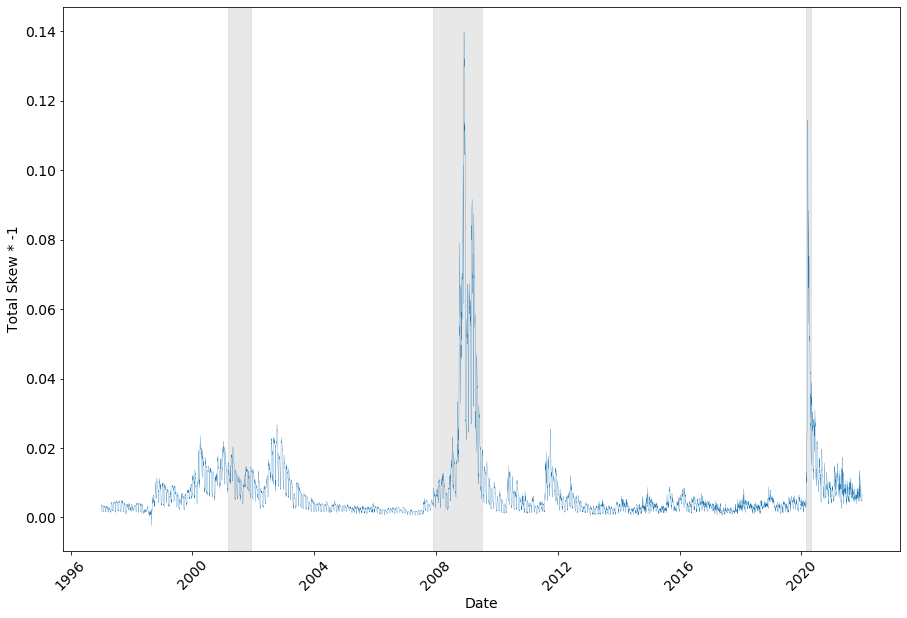

In [57]:
# choose any second parameter: basic / lower / upper / total
plot_skew(main_std, 'total')

### Cross-Sectional Regression

In [16]:
from sklearn import linear_model

def calc_regressions(df, skew_type):
    reg = linear_model.LinearRegression()
    stats = pd.DataFrame(columns=['beta_cycl', 'beta_D', 'beta_atm', 'beta_peers_cycl', 'beta_peers_D', 'beta_peers_atm', 'r2'])
    
    for date in df.Date.unique():
        temp = df.loc[df['Date'] == date]
        X = temp[['cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'peers_D', 'peers_impl_volatility']]
        if skew_type == 'basic':
            y = temp['skew']
        if skew_type == 'lower':
            y = temp['lower_skew']
        if skew_type == 'upper':
            y = temp['upper_skew']
        if skew_type == 'total':
            y = temp['total_skew']
                
        reg.fit(X, y)
        stats.loc[len(stats)] = [reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.score(X, y)]

    stats['Date'] = dates[0:6238]
    stats = stats.set_index('Date')
    return stats

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [17]:
# choose any second parameter: basic / lower / upper / total
stats = calc_regressions(main, 'basic')
[stats['beta_cycl'].autocorr(), stats['beta_D'].autocorr(), stats['beta_atm'].autocorr(), stats['beta_peers_cycl'].autocorr(), stats['beta_peers_D'].autocorr(), stats['beta_peers_atm'].autocorr(), stats['r2'].autocorr()]

[0.602905001175124,
 0.6939393819400014,
 0.758665923518159,
 0.6954599748102777,
 0.7268014949225146,
 0.602192330967611,
 0.8293542724549836]

In [18]:
stats.describe()

,beta_cycl,beta_D,beta_atm,beta_peers_cycl,beta_peers_D,beta_peers_atm,r2
count,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000
mean,-0.078456,-0.027075,-0.046174,-0.025096,-0.097040,-0.001719,0.073242
std,0.107601,0.093822,0.072024,0.211170,0.302942,0.080599,0.057976
min,-0.817578,-0.759767,-0.509633,-1.217768,-3.042113,-0.523844,0.001470
25%,-0.135473,-0.049948,-0.085244,-0.150468,-0.196231,-0.046260,0.032283
50%,-0.071445,-0.005996,-0.046265,-0.036027,-0.033616,-0.004279,0.055938
75%,-0.013685,0.007920,-0.002709,0.089020,0.042035,0.039377,0.096472
max,0.756789,0.736629,0.522281,1.416637,1.458502,0.522026,0.371903


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]), <a list of 10 Text yticklabel objects>)

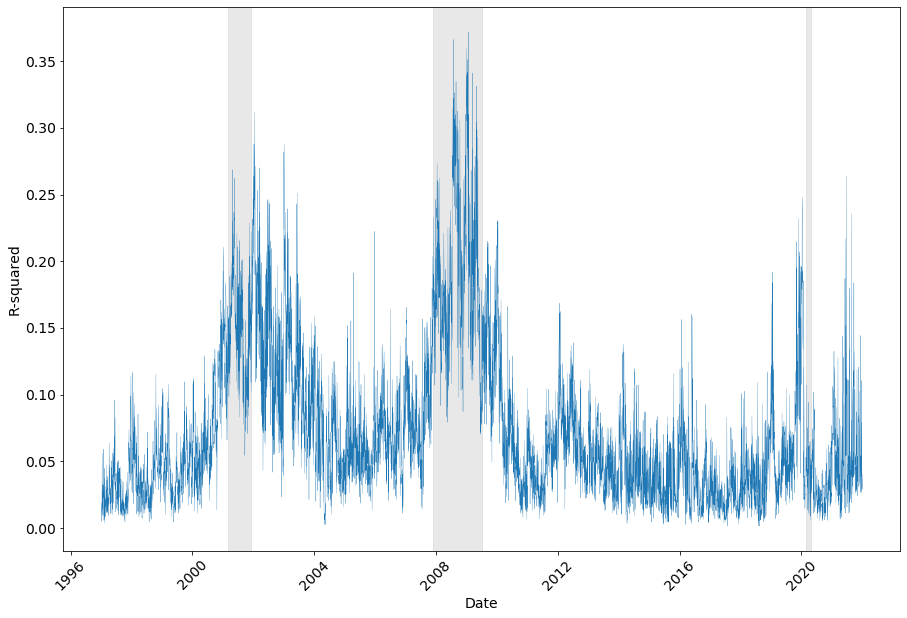

In [19]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(15,10))
plt.axvspan(datetime(2001, 3, 1), datetime(2001, 11, 30), color = 'lightgray', alpha = 0.5)
plt.axvspan(datetime(2007, 12, 1), datetime(2009, 6, 30), color = 'lightgray', alpha = 0.5)
plt.axvspan(datetime(2020, 2, 28), datetime(2020, 4, 30), color = 'lightgray', alpha = 0.5)
plt.xlabel('Date',fontsize=14)
plt.ylabel('R-squared',fontsize=14)
plt.plot(stats.index, stats['r2'], linewidth = 0.25)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)

In [20]:
# choose any of beta_cycl / beta_D / beta_atm / beta_peers_cycl / beta_peers_D / beta_peers_atm / r2
print(stats['beta_cycl'].quantile([0, 0.001, 0.01, 0.10, 0.25, 0.5, 0.75, 0.90, 0.99, 0.999, 1]))

0.000   -0.817578
0.001   -0.557638
0.010   -0.419874
0.100   -0.202684
0.250   -0.135473
0.500   -0.071445
0.750   -0.013685
0.900    0.039056
0.990    0.147163
0.999    0.531077
1.000    0.756789
Name: beta_cycl, dtype: float64
0.000   -0.759767
0.001   -0.601237
0.010   -0.373239
0.100   -0.132490
0.250   -0.049948
0.500   -0.005996
0.750    0.007920
0.900    0.046360
0.990    0.181651
0.999    0.488384
1.000    0.736629
Name: beta_D, dtype: float64
0.000   -0.509633
0.001   -0.367693
0.010   -0.245640
0.100   -0.126761
0.250   -0.085244
0.500   -0.046265
0.750   -0.002709
0.900    0.030656
0.990    0.133997
0.999    0.361766
1.000    0.522281
Name: beta_atm, dtype: float64
0.000   -1.217768
0.001   -0.774617
0.010   -0.544057
0.100   -0.267277
0.250   -0.150468
0.500   -0.036027
0.750    0.089020
0.900    0.248061
0.990    0.538963
0.999    0.759052
1.000    1.416637
Name: beta_peers_cycl, dtype: float64
0.000   -3.042113
0.001   -1.907920
0.010   -1.190388
0.100   -0.437521
0.250 

In [21]:
stats_basic = calc_regressions(main, 'basic')
stats_total = calc_regressions(main, 'total')
stats_lower = calc_regressions(main, 'lower')
stats_upper = calc_regressions(main, 'upper')

[0.808369632135036,
 0.9660192917126867,
 0.8941975440165592,
 0.7636660913277667,
 0.8503143994106623,
 0.8226659300952571,
 0.8916625070503844]

### Summary Time Series Statistics

In [33]:
def ts_summary(std_df, stats):
    
    main_pred = pd.DataFrame(columns=['Date', 'ticker', 'skew', 'skew_pred'])
    for index, row in stats.iterrows():
        b1 = row['beta_cycl']
        b2 = row['beta_D']
        b3 = row['beta_atm']
        b4 = row['beta_peers_cycl']
        b5 = row['beta_peers_D']
        b6 = row['beta_peers_atm']

        temp = std_df[std_df['Date'] == index]
        temp['skew_pred'] = b1 * temp['cyclicality'] + b2 * temp['D'] + b3 * temp['impl_volatility'] + b4 * temp['peers_cycl'] + b5 * temp['peers_D'] + b6 * temp['peers_impl_volatility'] 
        main_pred = pd.concat([main_pred, temp])

    main_pred['resid'] = main_pred['skew'] - main_pred['skew_pred']
       
    stats_ts = pd.DataFrame(columns=['ticker', 'pred_mean', 'pred_std', 'pred_auto', 'resid_mean', 'resid_std', 'resid_auto'])

    for ticker in list(main_pred.ticker.unique()):
        temp = main_pred[main_pred['ticker'] == ticker][['skew_pred','resid']]
        stats_ts.loc[len(stats_ts)] = [ticker, temp['skew_pred'].mean(), temp['skew_pred'].std(), temp['skew_pred'].autocorr(), 
                                       temp['resid'].mean(), temp['resid'].std(), temp['resid'].autocorr()]

    return main_pred, stats_ts

In [34]:
%%time
# choose one of basic / lower / upper / total
main_pred_basic, stats_ts_basic = ts_summary(main_std, calc_regressions(main, 'basic')) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Wall time: 19min 54s


In [35]:
# choose one of pred_mean / pred_std / pred_auto / resid_mean / resid_std / resid_auto
print(stats_ts_basic['pred_mean'].quantile([0, 0.001, 0.01, 0.10, 0.25, 0.5, 0.75, 0.90, 0.99, 0.999, 1]))

0.000   -0.449128
0.001   -0.445666
0.010   -0.429016
0.100   -0.264410
0.250   -0.129611
0.500   -0.042737
0.750    0.035030
0.900    0.111887
0.990    0.241634
0.999    0.286104
1.000    0.296401
Name: pred_mean, dtype: float64 0.000    0.106181
0.001    0.112211
0.010    0.139501
0.100    0.180300
0.250    0.234083
0.500    0.326249
0.750    0.422818
0.900    0.486466
0.990    0.563181
0.999    0.589199
1.000    0.602076
Name: pred_std, dtype: float64 0.000    0.427811
0.001    0.429395
0.010    0.450403
0.100    0.606040
0.250    0.658271
0.500    0.699720
0.750    0.750292
0.900    0.838418
0.990    0.878502
0.999    0.896300
1.000    0.906683
Name: pred_auto, dtype: float64 0.000   -0.302610
0.001   -0.301506
0.010   -0.260993
0.100   -0.152489
0.250   -0.076224
0.500   -0.001819
0.750    0.082530
0.900    0.222532
0.990    0.367573
0.999    0.405887
1.000    0.409827
Name: resid_mean, dtype: float64 0.000    0.112319
0.001    0.115592
0.010    0.141142
0.100    0.182763
0.250   

In [36]:
stats_ts_basic.describe()

,pred_mean,pred_std,pred_auto,resid_mean,resid_std,resid_auto
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,-0.052867,0.327301,0.705716,0.011333,0.322755,0.701644
std,0.146455,0.115370,0.088237,0.140734,0.108056,0.085048
min,-0.449128,0.106181,0.427811,-0.302610,0.112319,0.397326
25%,-0.129611,0.234083,0.658271,-0.076224,0.235042,0.663216
50%,-0.042737,0.326249,0.699720,-0.001819,0.324468,0.698802
75%,0.035030,0.422818,0.750292,0.082530,0.414483,0.747902
max,0.296401,0.602076,0.906683,0.409827,0.574647,0.880718


In [37]:
%%time
main_pred_basic, stats_ts_basic = ts_summary(main_std, calc_regressions(main, 'basic')) 
main_pred_total, stats_ts_total = ts_summary(main_std, calc_regressions(main, 'total')) 
main_pred_lower, stats_ts_lower = ts_summary(main_std, calc_regressions(main, 'lower')) 
main_pred_upper, stats_ts_upper = ts_summary(main_std, calc_regressions(main, 'upper')) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Wall time: 20min 26s


# Decile Portfolio Composition

In [59]:
%%time
start_date = '1996-01-01'
end_date = '2022-12-31'
ticker_list = list(sp500_ticker_list) + ['^GSPC']
#ticker_list = list(sp500_secid_df.ticker) + ['^GSPC']

data = yf.download(ticker_list, start_date, end_date)

[*********************100%***********************]  1090 of 1091 completed

254 Failed downloads:
- WYE: No data found for this date range, symbol may be delisted
- GFS.A: No timezone found, symbol may be delisted
- RDC: No timezone found, symbol may be delisted
- JHF: No data found for this date range, symbol may be delisted
- LO: No data found for this date range, symbol may be delisted
- KSU: No timezone found, symbol may be delisted
- BVSN: No timezone found, symbol may be delisted
- SWY: No data found for this date range, symbol may be delisted
- SAPE: No data found for this date range, symbol may be delisted
- VAR: No timezone found, symbol may be delisted
- AKS: No timezone found, symbol may be delisted
- MDR: No timezone found, symbol may be delisted
- TIF: No timezone found, symbol may be delisted
- RSHCQ: No data found for this date range, symbol may be delisted
- CFN: No data found for this date range, symbol may be delisted
- USW: No data found for this date range, symbol m

Wall time: 2min 23s


In [60]:
data = data.reset_index()[['Date','Adj Close']]

In [61]:
#horizon = 5 #here we set the investment horizon, 5 = weekly, 20 = monthly, 63 = quarterly
portfolio_data = data.set_index('Date')#.pct_change(horizon) 

In [62]:
portfolio_data = portfolio_data['Adj Close'].drop('^GSPC', axis = 1)
portfolio_data.columns = pd.MultiIndex.from_product([['Adj Close'], portfolio_data.columns])

In [63]:
portfolio_data

Adj Close                                                        \
                     A AABA    AAL AAMRQ         AAP        AAPL        ABBV   
Date                                                                           
1996-01-02         NaN  NaN    NaN   NaN         NaN    0.243460         NaN   
1996-01-03         NaN  NaN    NaN   NaN         NaN    0.243460         NaN   
1996-01-04         NaN  NaN    NaN   NaN         NaN    0.239198         NaN   
1996-01-05         NaN  NaN    NaN   NaN         NaN    0.259565         NaN   
1996-01-08         NaN  NaN    NaN   NaN         NaN    0.262407         NaN   
...                ...  ...    ...   ...         ...         ...         ...   
2022-12-23  148.481873  NaN  12.71   NaN  141.008743  131.299820  158.336090   
2022-12-27  148.800293  NaN  12.53   NaN  142.721176  129.477585  158.229294   
2022-12-28  147.347595  NaN  12.32   NaN  142.996735  125.504539  157.491486   
2022-12-29  150.332550  NaN  12.70   NaN  143.990723  129.059372  157.811859   
2022-12-30  149.121826  NaN  12.72   NaN  144.699310  129.378006  156.889603   

                                  ...                                        \
                   ABC ABI ABKFQ  ...         XOM       XRAY        XRX XTO   
Date                              ...                                         
1996-01-02    3.159726 NaN   NaN  ...    8.599433   5.470595  32.640091 NaN   
1996-01-03    3.088106 NaN   NaN  ...    8.626097   5.539845  32.610188 NaN   
1996-01-04    3.088106 NaN   NaN  ...    8.679425   5.522531  31.922707 NaN   
1996-01-05    3.111852 NaN   NaN  ...    8.892744   5.435971  31.564016 NaN   
1996-01-08    3.063977 NaN   NaN  ...    8.999405   5.401346  31.504246 NaN   
...                ...  ..   ...  ...         ...        ...        ...  ..   
2022-12-23  169.002655 NaN   NaN  ...  106.052940  31.472191  13.867512 NaN   
2022-12-27  167.998657 NaN   NaN  ...  107.526436  31.709494  13.952938 NaN   
2022-12-28  166.368378 NaN   NaN  ...  105.760185  30.631746  13.639709 NaN   
2022-12-29  165.066132 NaN   NaN  ...  106.560371  32.046436  13.997123 NaN   
2022-12-30  164.728149 NaN   NaN  ...  107.633774  31.609619  14.103383 NaN   

                                                                       \
                   XYL         YUM         ZBH        ZBRA       ZION   
Date                                                                    
1996-01-02         NaN         NaN         NaN   15.388889  12.347618   
1996-01-03         NaN         NaN         NaN   15.666667  12.074954   
1996-01-04         NaN         NaN         NaN   14.000000  11.568584   
1996-01-05         NaN         NaN         NaN   13.444444  11.607543   
1996-01-08         NaN         NaN         NaN   13.444444  11.490679   
...                ...         ...         ...         ...        ...   
2022-12-23  108.675713  127.117897  126.238785  248.220001  46.701611   
2022-12-27  109.656204  128.104065  126.826675  251.000000  47.077538   
2022-12-28  107.893311  127.522232  125.541275  246.839996  46.238934   
2022-12-29  110.567368  128.192841  127.374718  257.529999  47.308880   
2022-12-30  109.507645  126.309235  127.045898  256.410004  47.385986   

                        
                   ZTS  
Date                    
1996-01-02         NaN  
1996-01-03         NaN  
1996-01-04         NaN  
1996-01-05         NaN  
1996-01-08         NaN  
...                ...  
2022-12-23  144.788239  
2022-12-27  144.331329  
2022-12-28  142.871109  
2022-12-29  147.162308  
2022-12-30  145.572983  

[6798 rows x 1090 columns]

In [70]:
import math
import numpy as np
import numpy.matlib
import statsmodels.api as sm

#import statsmodels.formula.api as sm

def nwSE(r, lag, h0):
    
    T = len(r)
    vv = r.var()
    
    for i in range(1, lag):
        cc = np.cov(np.vstack((r[:-i], r[i:])))
        vv = vv + 2*(1-i/lag)*cc[0,1]
        y = math.sqrt(vv)*math.sqrt(T-lag)/math.sqrt(T-1)
        
    return y 


def calc_portfolios(ret_data, regr_data, type_skew, horizon):
    # type_skew: skew / skew_pred / resid
    # horizon: 5 (weekly) / 20 (monthly) / 63 (quarterly)
    ret_data = ret_data.pct_change(horizon).shift(periods = -horizon)
    decile_returns_skew_df = pd.DataFrame(columns=['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'Date'])
    for date in regr_data.Date.unique():
        temp = regr_data.loc[regr_data['Date'] == date].sort_values(by=type_skew)
        temp['decile'] = pd.qcut(temp[type_skew], q=10, labels=False)
        tickers_by_decile = [list(group['ticker']) for _, group in temp.groupby('decile')]

        decile_returns = []
        for tickers in tickers_by_decile:
            decile_return = 0
            for ticker in tickers:
                val = ret_data.loc[date]['Adj Close'][ticker]
                decile_return += val
            decile_return = decile_return / len(tickers)
            decile_returns.append(decile_return)
        decile_returns.append(date)
        decile_returns_skew_df.loc[len(decile_returns_skew_df)] = decile_returns
    
    for column in ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10']:
        if pd.isna(decile_returns_skew_df[column][0]):    
            decile_returns_skew_df.iloc[0][column] = decile_returns_skew_df[column].iloc[decile_returns_skew_df[column].index.get_loc(decile_returns_skew_df[column].first_valid_index())]
        decile_returns_skew_df[column] = decile_returns_skew_df[column].interpolate()

    ann_ret = []
    stds = []
    for m in decile_returns_skew_df.mean():
        ann_ret.append((m+1)**(252/horizon)-1)
    for std in decile_returns_skew_df.std():
        stds.append(std)
    
    t_stats = []
    for i in range(10):
        t_stats.append((decile_returns_skew_df.mean()[i] / stds[i]) * (math.sqrt(6238-horizon)))
        
        #print(decile_returns_skew_df[decile_returns_skew_df.columns[i]])
        #t_stats.append(nwSE(decile_returns_skew_df[decile_returns_skew_df.columns[i]], 12, 0))
        #reg = linear_model.LinearRegression()
        #rets = decile_returns_skew_df[decile_returns_skew_df.columns[i]]
        #constant = pd.Series(1, index=rets.index)        
        
        #results = reg.fit(constant, rets)
        #nw_se = results.get_robustcov_results().HC1_se
        #t_stat = results.params[1] / nw_se
        #t_stats.append(t_stat)

    return ann_ret, t_stats

In [71]:
%%time
calc_portfolios(portfolio_data, main_pred_basic, 'skew', 5) 
# choose any of:
# second parameter: main_pred_ + basic / lower / upper / total. Need to run previous code to get these dfs
# third parameter: skew / skew_pred / resid
# fourth parameter: 5 / 20 / 63

Wall time: 30min 38s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


([0.22684142360186388,
  0.18643577183933746,
  0.17430144059849595,
  0.18326906760916817,
  0.17962523125239116,
  0.18297501139138106,
  0.18838473560728763,
  0.1884495864336957,
  0.21617170338125047,
  0.2341473144651216],
 [7.900828918525491,
  8.132187277090054,
  8.691656482444126,
  9.919595785318858,
  10.100093617617208,
  10.771515266401863,
  11.619472984211189,
  11.730038137674176,
  12.068520879403511,
  11.938677331430185])

## Factor Model

In [100]:
import math
def calc_factor_portfolios(ret_data, regr_data, horizon):
    # horizon: 5 (weekly) / 20 (monthly) / 63 (quarterly)
    
    ret_temp = ret_data.pct_change(horizon).shift(periods = -horizon).unstack(level=1).unstack(level=0).reset_index(level=1).reset_index()
    ret_temp.columns = ['ticker', 'Date', 'ret']
    ret_temp['ret'] = (ret_temp['ret']+1)**(252/horizon)-1
    f_model_temp = pd.merge(regr_data, ret_temp, on=['Date', 'ticker'])
    f_model_temp.ret = winsorize(f_model_temp.ret, limits=[0.1,0.1])

    reg = linear_model.LinearRegression()
    f_model_stats = pd.DataFrame(columns=['beta_size', 'beta_bm', 'beta_mom', 'beta_cycl', 'beta_D', 'beta_atm', 'beta_peers_cycl', 'beta_peers_D', 'beta_peers_atm', 'beta_resid', 'r2'])

    for date in f_model_temp.Date.unique():
        temp = f_model_temp.loc[f_model_temp['Date'] == date]
        X = temp[['size', 'book_to_market', 'momentum', 'cyclicality', 'D', 'impl_volatility', 'peers_cycl', 'peers_D', 'peers_impl_volatility', 'resid']]
        y = temp['ret']
        reg.fit(X, y)
        coefs = [reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7], reg.coef_[8], reg.coef_[9]]
        coefs_temp = [abs(coef) for coef in coefs]
        coefs = [coef * 2 / sum(coefs_temp) for coef in coefs]
        coefs = [coefs, [reg.score(X, y)]]
        row = [item for sublist in coefs for item in sublist]
        f_model_stats.loc[len(f_model_stats)] = row

    f_model_stats['Date'] = dates[0:6238]
    f_model_stats = f_model_stats.set_index('Date')
    
    factor_rets = []
    stds = []
    
    for m in f_model_stats.mean()[0:10]:
        factor_rets.append(m)
    for std in f_model_stats.std()[0:10]:
        stds.append(std)
    
    t_stats = []
    for i in range(10):
        t_stats.append(f_model_stats.mean()[i] / (stds[i] / math.sqrt(6238)))

    return factor_rets, t_stats

In [103]:
%%time
# choose any of:
# second parameter: main_pred_ + basic / lower / upper / total. Need to run previous code to get these dfs
# third parameter: 5 / 20 / 63
calc_factor_portfolios(portfolio_data, main_pred_basic, 63)

Wall time: 2min 35s


([-0.05811565617940474,
  -0.005575979369783097,
  -0.002275840695877826,
  -0.012839101866938075,
  -0.04507333045311953,
  0.09437961259633111,
  0.014273739268012828,
  -0.03889493359231921,
  -0.010976154055799662,
  0.09033169500552071],
 [-39.768598919823596,
  -2.7322330816399605,
  -1.2032830964234444,
  -5.365375426152528,
  -24.592892864304957,
  42.27222454553503,
  5.428645242036694,
  -12.909315809202274,
  -5.258788175325808,
  8.386183526018362])